<a href="https://colab.research.google.com/github/TanviS001/IndiaAI_CyberGuard_AI_Hackathon/blob/main/IndiaAI_CyberGuard_AI_Hackathon_Stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IndiaAI CyberGuard AI Hackathon
## Project name : Cyber Justice

---

### For Stage 1 Submission:

#### Problem Statement:
- Development of an NLP Model for Text Analytics and classification

#### Objective:
- To develop an NLP model that categorizes complaint based on victim, type of fraud and other relevant parameters used for text classification and preparing the final model.

#### Outputs:
- Goal 1. **Text Preprocessing:** Tokenization, stop word removal, stemming, and text
cleaning to prepare data.
- Goal 2. **Model Development:** Selection of a suitable NLP model for text
classification
- Goal 3. **Accuracy Measurement:** Evaluate the model based on metrics such as
accuracy, precision, recall, and F1-score.

---

# Introduction :

- "Cyber Justice" is a project undertaken as a part of 'IndiaAI CyberGuard AI Hackathon 2024'

- There are three stages in the hackathon and this notebook represents stage 1 submission.

- The stage 1 of this hackathon asks participants to develop a model that can perform classification of complaints into various categories

# Project summary :

- In this project, the goal is to develop an NLP model that categorizes complaint based on victim, type of fraud and other relevant parameters used for text classification and preparing the final model.
- For this purpose I have to achieve 3 goals:
    1.   Text Preprocessing
    2.   Model Development
    3.   Accuracy measurement

-  The goals are further divided into tasks wherever applicable

    1.  Text Preprocessing consists of tasks like
      - Text analysis, preprocessing and cleaning
      - Tokenization
      - stop word removal
      - Stemming

    2.  Model development consists of
      - Feature encoding (we use label encoding and TF-IDF Vectorizer for feature encoding)
      - Model selection (We combine TF-IDF and Logistic regerssion which combined together performs effective NLP)
      - Model training (Here the model is trained on numeric data that is obtained after featuer encoding)

    3.  Accuracy Measurement
      - The model is evaluated on an unseen test dataset, and performance metrics such as accuracy, precision, recall, and F1 score are computed to assess its effectiveness.

# Goal 1. Text Preprocessing
Requirements:
- Tokenization
- Stop word removal
- Stemming
- Text cleaning

Task Workflow:

1. Text Cleaning → 2. Tokenization → 3. Stop Word Removal → 4. Stemming

## Task 1. Text Cleaning


### **steps**:

1. Import libraries
2. Read datasets
3. Sanity check
4. Exploratory Data Analysis
5. Missing Value Treatment
6. Duplicates value treatment
7. Text Cleaning

### Step 1 : Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# some libraries are imported locally for better local management

### Step 2 : Reading the '.csv' file

#### Read "Training" dataset

In [6]:
df_train=pd.read_csv('/content/train.csv')

In [7]:
df_train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [8]:
df_train.tail()

,category,sub_category,crimeaditionalinfo
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...
93685,Online Financial Fraud,Fraud CallVishing,There is app name koko loan app they send the ...


#### Read "Testing" dataset

In [9]:
df_test=pd.read_csv('/content/test.csv')

In [10]:
df_test.head()

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...


In [11]:
df_test.tail()

,category,sub_category,crimeaditionalinfo
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...
31228,Any Other Cyber Crime,Other,I saw add on facebook for job placement and I ...


### Step 3 : Sanity Checking

#### Shape of Training *Dataset*

In [12]:
df_train.shape

(93686, 3)

#### Shape of Testing dataset

In [13]:
df_test.shape

(31229, 3)

#### Information of Training dataset

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


#### Information of Testing dataset

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


#### Missing values in Training dataset

In [16]:
df_train.isnull().sum()

,0
category,0
sub_category,6591
crimeaditionalinfo,21


In [17]:
df_train.isnull().sum()/df_train.shape[0]*100

,0
category,0.000000
sub_category,7.035203
crimeaditionalinfo,0.022415


#### Missing values in Testing dataset

In [18]:
df_test.isnull().sum()

,0
category,0
sub_category,2236
crimeaditionalinfo,7


In [19]:
df_test.isnull().sum()/df_test.shape[0]*100

,0
category,0.000000
sub_category,7.160012
crimeaditionalinfo,0.022415


#### Duplicates in Training dataset

In [20]:
df_train.duplicated().sum()

7803

#### Duplicates in Testing dataset

In [21]:
df_test.duplicated().sum()

2154

### Step 4 : Exploratory Data Analysis

#### Discriptive statistics for Training dataset

- Descriptive statistics would give us extra information about data like number of entries in each column, how many unique entries are there, frequently repeated values, etc

In [22]:
df_train.describe().T

,count,unique,top,freq
category,93686,15,Online Financial Fraud,57434
sub_category,87095,35,UPI Related Frauds,26856
crimeaditionalinfo,93665,85013,Respected Sir\r\n\r\nA very serious matter I w...,2342


In [23]:
df_train.describe(include='object').T

,count,unique,top,freq
category,93686,15,Online Financial Fraud,57434
sub_category,87095,35,UPI Related Frauds,26856
crimeaditionalinfo,93665,85013,Respected Sir\r\n\r\nA very serious matter I w...,2342


#### Discriptive statistics for Testing dataset

- I am going to perform similar analysis for test data to understand count, uniue elements, frequently repeated elements, etc

In [24]:
df_test.describe().T

,count,unique,top,freq
category,31229,15,Online Financial Fraud,18896
sub_category,28993,37,UPI Related Frauds,8890
crimeaditionalinfo,31222,28785,Respected Sir\r\n\r\nA very serious matter I w...,753


In [25]:
df_test.describe(include='object').T

,count,unique,top,freq
category,31229,15,Online Financial Fraud,18896
sub_category,28993,37,UPI Related Frauds,8890
crimeaditionalinfo,31222,28785,Respected Sir\r\n\r\nA very serious matter I w...,753


#### Bar Plot : Distribution of training data

**Bar plot for 'category' column in training dataset**
- Visualizing the distribution of data in column 'category'.
- There are 15 unique elements hence we can figure out their distribution using bar plot

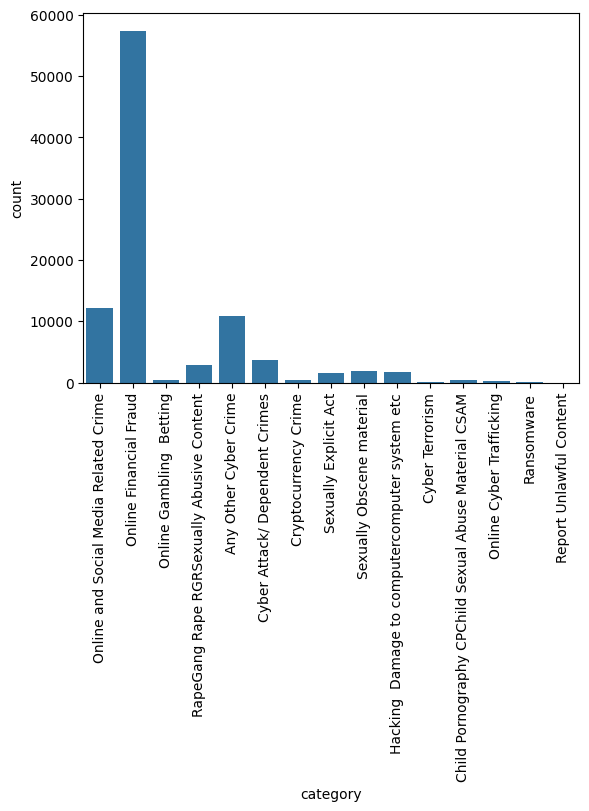

In [26]:
sns.countplot(x='category', data=df_train)
plt.xticks(rotation=90)
plt.show()

---

**Bar plot for 'sub_category' column in training dataset**
- Visualizing the distribution of data in column 'sub_category'
- There are 35 unique elements in sub_category
- The bar plot will again help us understand distribution of data in column 'sub_category'

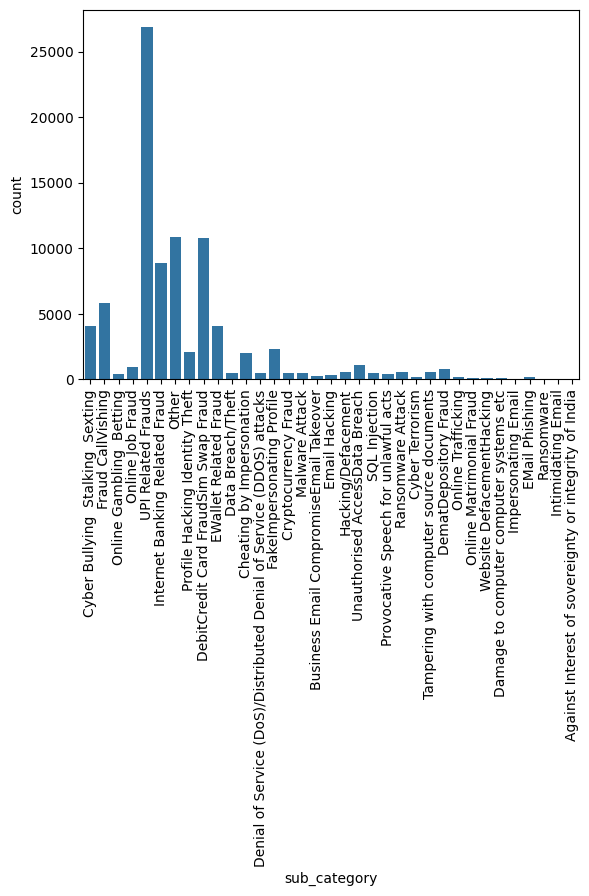

In [27]:
sns.countplot(x='sub_category', data=df_train)
plt.xticks(rotation=90)
plt.show()

#### Bar plot: Distribution of Testing data

**Bar plot for 'category' column in testing dataset**
- Visualizing the distribution of data in column 'category'.
- There are 15 unique elements hence we can figure out their distribution using bar plot

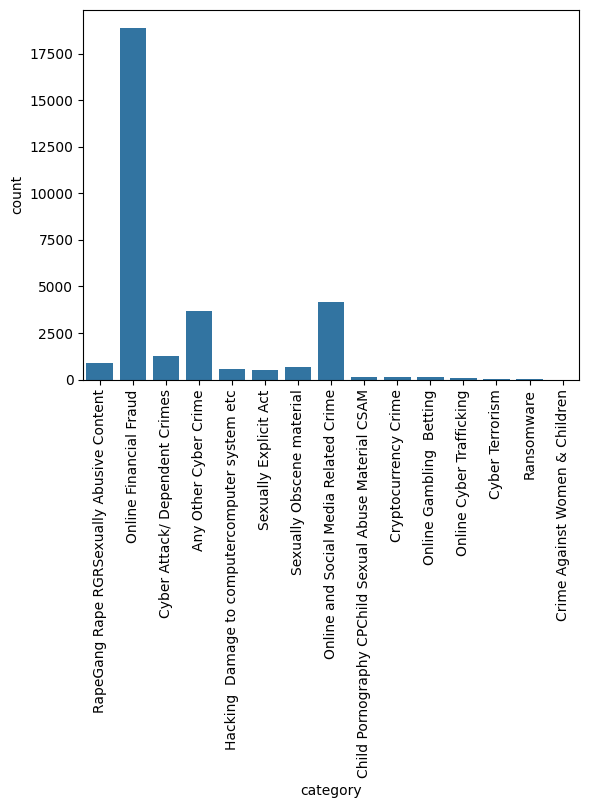

In [28]:
sns.countplot(x='category', data=df_test)
plt.xticks(rotation=90)
plt.show()

---

**Bar plot for 'sub_category' column in testing dataset**

- Visualizing the distribution of data in column 'sub_category'
- There are 35 unique elements in sub_category
- The bar plot will again help us understand distribution of data in column 'sub_category'

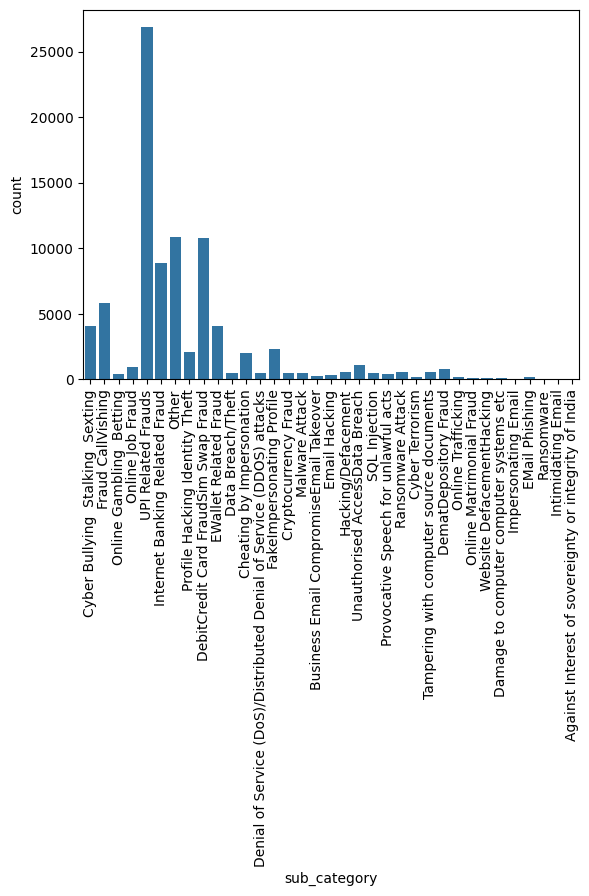

In [29]:
sns.countplot(x='sub_category', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Step 5 : Missing value treatment

#### Missing value treatment in Training dataset

- To treat missing values I am going to replace null value with the mode of that column as we are dealing with categorical data, the central tendency could be found out using mode.

In [30]:
for i in ["category", "sub_category", "crimeaditionalinfo"]:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])

In [31]:
df_train.isnull().sum()

,0
category,0
sub_category,0
crimeaditionalinfo,0


#### Misssing value treatment in Testing dataset


- Following same steps for test dataset for better compatibility
- I am replacing null values in each column with respective mode


In [33]:
for i in ["category", "sub_category", "crimeaditionalinfo"]:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [34]:
df_test.isnull().sum()

,0
category,0
sub_category,0
crimeaditionalinfo,0


### Step 6 : Duplicate value  traement

#### Duplicate value traement for Training dataset

- As duplicate data increases redundency and causes unnecessary entries in our dataset, removing duplicates is essential for making data more concise.
- I am going to check for duplicates and keep only the first occurance and drop later occurances.

In [35]:
duplicates = df_train[df_train['crimeaditionalinfo'].duplicated()]
print(duplicates)

                                        category        sub_category  \
77     RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
92     RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
98     RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
117    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
129    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
...                                          ...                 ...   
93653  RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
93659                     Online Financial Fraud  UPI Related Frauds   
93667  RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
93668                     Online Financial Fraud  UPI Related Frauds   
93678  RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   

                                      crimeaditionalinfo  
77     Respected Sir\r\n\r\nA very serious matter I w...  
92     Respected 

In [36]:
crime_counts = df_train['crimeaditionalinfo'].value_counts()

In [37]:
print(crime_counts[crime_counts > 1])

crimeaditionalinfo
Respected Sir\r\n\r\nA very serious matter I want to inform you Few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge RUBY HOSPITAL BEHIND area KASBA ANANDAPUR QUEST MALL metropolis mall area ACROPOLISMALL area park circus FORUM MALL ELGIN RD Parkstreet MAIDAN AREA esplanade Garia jadavpur BEHALASAKHERBAZAR JOKA BANSDRONI  Rabindrasadanexide area  HARIDEVPUR triangular park lake mall area rashbehari area TOLLYGUNGE THAKURPUKUR BBD BAG DALHOUSIE AREA  and SALTLAKE\r\n\r\nTheir name \r\nSUBHRO SAHA AMLAN DATTA \r\nIZAZ AHMED Anirban\r\n\r\n\r\nThey officially work in a insurance office hdfclife  a hindustanpark ab gariahat shopping mall st floor beside of reliance trend building near gariahat more  but outside at several places  they involve in some shamefull activities last years\r\n\r\nSir a person SUBHRO SAHA forcefully involve few women employee ex FEMALE employee in such shamefull doing\r\n

In [38]:
df_train = df_train.drop_duplicates(subset=['crimeaditionalinfo'], keep='first')

In [39]:
df_train.shape

(85013, 3)

#### Duplicate value traement for Testing dataset

- I will perform similar operations on testing dataset in order to keep it compatible, concise and reliable
- Task is to check for duplicates, keep first occurance and drop the rest of the duplicate entries

In [40]:
duplicates = df_test[df_test['crimeaditionalinfo'].duplicated()]
print(duplicates)

                                        category        sub_category  \
96     RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
108    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
160    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
176    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
185    RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
...                                          ...                 ...   
31182  RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   
31190                     Online Financial Fraud  UPI Related Frauds   
31194                     Online Financial Fraud  UPI Related Frauds   
31207                     Online Financial Fraud  UPI Related Frauds   
31209  RapeGang Rape RGRSexually Abusive Content  UPI Related Frauds   

                                      crimeaditionalinfo  
96     Respected Sir\r\n\r\nA very serious matter I w...  
108    Respected 

In [41]:
crime_counts = df_test['crimeaditionalinfo'].value_counts()

In [42]:
print(crime_counts[crime_counts > 1])

crimeaditionalinfo
Respected Sir\r\n\r\nA very serious matter I want to inform you Few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge RUBY HOSPITAL BEHIND area KASBA ANANDAPUR QUEST MALL metropolis mall area ACROPOLISMALL area park circus FORUM MALL ELGIN RD Parkstreet MAIDAN AREA esplanade Garia jadavpur BEHALASAKHERBAZAR JOKA BANSDRONI  Rabindrasadanexide area  HARIDEVPUR triangular park lake mall area rashbehari area TOLLYGUNGE THAKURPUKUR BBD BAG DALHOUSIE AREA  and SALTLAKE\r\n\r\nTheir name \r\nSUBHRO SAHA AMLAN DATTA \r\nIZAZ AHMED Anirban\r\n\r\n\r\nThey officially work in a insurance office hdfclife  a hindustanpark ab gariahat shopping mall st floor beside of reliance trend building near gariahat more  but outside at several places  they involve in some shamefull activities last years\r\n\r\nSir a person SUBHRO SAHA forcefully involve few women employee ex FEMALE employee in such shamefull doing\r\n

In [43]:
df_test = df_test.drop_duplicates(subset=['crimeaditionalinfo'], keep='first')

In [44]:
df_test.shape

(28785, 3)

### Step 7 : Text Cleaning

#### Text cleaning for Training and Testing datasets

- Now let's create a function for removing unnecessary elements like whitespace, leading and lagging spaces, special characters, etc
- This will ensure readability, scalability
- Goal is to clean 3rd column 'crimeaditionalinfo' containing textual data




In [45]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df_train['cleaned_text'] = df_train['crimeaditionalinfo'].apply(clean_text)
df_test['cleaned_text'] = df_test['crimeaditionalinfo'].apply(clean_text)

In [46]:
print(df_train[['crimeaditionalinfo', 'cleaned_text']].head())
print(df_test[['crimeaditionalinfo', 'cleaned_text']].head())

                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                        cleaned_text  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that she w...  
                                  crimeaditionalinfo  \
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...   
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT   
2  The issue actually started when I got this ema...   
3  I am amit kumar from karwi chitrakoot I am tot...   
4  I have ordered  saree and  blouse from rinki s... 

## Task 2: Tokenization

- Tokenization is the process of breaking down text into smaller units, called "tokens."

- These tokens can be words, subwords, or even characters, depending on the level of tokenization.

- Tokenization helps in simplifying text data, making it easier to analyze and process for tasks like text classification, sentiment analysis, and machine translation.

- it converts raw text into manageable pieces (tokens) that can be fed into machine learning models for further analysis, such as using TF-IDF or word embeddings, which is our goal.

In [47]:
# Download punkt_tab
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

- Now, I'll consider tokenizing the 'cleaned text' as it will not have whitespace, special characters, etc.

In [48]:
df_train['tokens'] = df_train['cleaned_text'].apply(word_tokenize)
df_test['tokens'] = df_test['cleaned_text'].apply(word_tokenize)

In [49]:
print(df_train['tokens'].head())
print(df_test['tokens'].head())

0    [I, had, continue, received, random, calls, an...
1    [The, above, fraudster, is, continuously, mess...
2    [He, is, acting, like, a, police, and, demandi...
3    [In, apna, Job, I, have, applied, for, job, in...
4    [I, received, a, call, from, lady, stating, th...
Name: tokens, dtype: object
0    [Sir, namaskar, mein, Ranjit, Kumar, PatraPais...
1        [KOTAK, MAHINDRA, BANK, FRAUD, FRAUD, AMOUNT]
2    [The, issue, actually, started, when, I, got, ...
3    [I, am, amit, kumar, from, karwi, chitrakoot, ...
4    [I, have, ordered, saree, and, blouse, from, r...
Name: tokens, dtype: object


## Task 3: Stop word removal

- NLP libraries like nltk come with predefined lists of stop words for various languages.
- Let's first process the data for English words.

In [50]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
stop_words = set(stopwords.words('english'))

df_train['tokens'] = df_train['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df_test['tokens'] = df_test['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [52]:
print(df_train['tokens'].head())
print(df_test['tokens'].head())

0    [continue, received, random, calls, abusive, m...
1    [fraudster, continuously, messaging, Asking, p...
2    [acting, like, police, demanding, money, addin...
3    [apna, Job, applied, job, interview, telecalli...
4    [received, call, lady, stating, send, new, pho...
Name: tokens, dtype: object
0    [Sir, namaskar, mein, Ranjit, Kumar, PatraPais...
1        [KOTAK, MAHINDRA, BANK, FRAUD, FRAUD, AMOUNT]
2    [issue, actually, started, got, email, first, ...
3    [amit, kumar, karwi, chitrakoot, totally, depr...
4    [ordered, saree, blouse, rinki, sur, paid, amo...
Name: tokens, dtype: object


## Task 4: Stemming

- Stemming is a Natural Language Processing (NLP) technique used to reduce words to their root or base form.

- The goal is to group together words that have the same meaning but appear in different grammatical forms.

- I will apply stemming to the tokens created during Tokenization

In [53]:
stemmer = PorterStemmer()

df_train['tokens'] = df_train['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df_test['tokens'] = df_test['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [54]:
print(df_train['tokens'].head())
print(df_test['tokens'].head())

0    [continu, receiv, random, call, abus, messag, ...
1    [fraudster, continu, messag, ask, pay, money, ...
2    [act, like, polic, demand, money, ad, section,...
3    [apna, job, appli, job, interview, telecal, re...
4    [receiv, call, ladi, state, send, new, phone, ...
Name: tokens, dtype: object
0    [sir, namaskar, mein, ranjit, kumar, patrapais...
1        [kotak, mahindra, bank, fraud, fraud, amount]
2    [issu, actual, start, got, email, first, glanc...
3    [amit, kumar, karwi, chitrakoot, total, depres...
4    [order, sare, blous, rinki, sur, paid, amount,...
Name: tokens, dtype: object


In [55]:
df_train.to_csv('train_processed.csv', index=False)
df_test.to_csv('test_processed.csv', index=False)

In [56]:
train_data = pd.read_csv('train_processed.csv')
test_data = pd.read_csv('test_processed.csv')

# Goal 2. Model Development:

Requirement:
1. Encoding Text Data
2. Choose Model
3. Train the Model

## Task 1: Feature Encoding

- There are 3 columns in the dataset that require conversion from categorical or textual data to numeric form, which is a process known as feature encoding.

- The columns that need encoding are:

    1. category
    2. sub_category
    3. tokens

- Label Encoding is suitable for the category and sub_category columns, as these have 15 and 35 unique values, respectively, that repeat throughout the dataset.

- The tokens column is a preprocessed version of the crimeaditionalinfo column, containing root words.

- For tokens, TF-IDF Vectorization is ideal as it converts textual data into numeric form by assigning importance to each token based on its frequency in the dataset.

#### Step 1 : Import statements

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

#### Step 2 : Label Encoding of 'category' and 'sub_category'

- Label Encoding is a technique used to convert categorical data (like labels or categories) into numeric values.

- This is important for machine learning algorithms since they typically require numerical input.

- In label encoding, each unique label within given data is assigned a unique integer.

In [58]:
label_encoder = LabelEncoder()

# now I will categories and sub_categories from both train and test data for consistency
combined_categories = pd.concat([train_data['category'], test_data['category']], axis=0)
combined_sub_categories = pd.concat([train_data['sub_category'], test_data['sub_category']], axis=0)

# label encoding for category
label_encoder.fit(combined_categories)
train_data['category_encoded'] = label_encoder.transform(train_data['category'])
test_data['category_encoded'] = label_encoder.transform(test_data['category'])

# label encoding for sub_category
label_encoder.fit(combined_sub_categories)
train_data['sub_category_encoded'] = label_encoder.transform(train_data['sub_category'])
test_data['sub_category_encoded'] = label_encoder.transform(test_data['sub_category'])

#### Step 3 : TF-IDF Vectorization on 'tokens' column

- TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical technique used in Natural Language Processing (NLP) to transform text data into numerical vectors, which can then be used by machine learning algorithms.

- Terms to remember:
  - Corpus : Collection of documents

- Components of TF-IDF:
  - Term Frequency (TF) : This measures how frequently a term (word) appears in a document

  - Inverse Document Frequency (IDF) : This measures how important a term is within the entire corpus

  - TF-IDF Score : The TF-IDF score is the product of TF and IDF


In [59]:
# apply TF-IDF Vectorization to 'token' column

vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), stop_words='english', max_features=10000)
X_train_tokens = vectorizer.fit_transform(train_data['tokens'].apply(' '.join))
X_test_tokens = vectorizer.transform(test_data['tokens'].apply(' '.join))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Step 4 : Combinining TF-IDF features with the encoded columns

- Combine TF-IDF encoded data with the encoded 'category' and 'sub_category'

In [60]:
X_train_numeric = train_data[['category_encoded', 'sub_category_encoded']].values
X_test_numeric = test_data[['category_encoded', 'sub_category_encoded']].values

X_train_combined = hstack([X_train_tokens, X_train_numeric])
X_test_combined = hstack([X_test_tokens, X_test_numeric])

#### Step 5: Converting sparse matrices to dense format

- sparse matrices are matrices where most of the elements are zero.

- They are typically used to store large datasets efficiently by only storing the non-zero elements along with their indices.

- When a sparse matrix is converted to a dense matrix, the matrix is fully expanded, and all the zero elements are explicitly stored.

-  many classical machine learning algorithms (like Logistic Regression) work better with dense matrices

- Dense matrices can sometimes be easier to work with in terms of manipulation or visualization, as they don't require special handling for zeros.

In [61]:
X_train_df = pd.DataFrame(X_train_combined.todense())
X_test_df = pd.DataFrame(X_test_combined.todense())

#### Step 6 : Save combined features to CSV

In [62]:
X_train_df.to_csv('X_train_combined.csv', index=False)
X_test_df.to_csv('X_test_combined.csv', index=False)

#### Step 7: Verifying the combined features

In [63]:
print(X_train_df.head())
print(X_test_df.head())

         0         1         2         3         4         5         6   \
0  0.784404  0.379350  0.014439  0.014439  0.080803  0.074642  0.029830   
1  0.780485  0.372374  0.019396  0.019396  0.000000  0.140369  0.060103   
2  0.776003  0.371163  0.018366  0.018366  0.000000  0.094941  0.094854   
3  0.792237  0.390073  0.007721  0.007721  0.043205  0.071840  0.055824   
4  0.791791  0.376721  0.020712  0.020712  0.046363  0.128484  0.064183   

         7         8         9   ...        20        21        22        23  \
0  0.147997  0.016585  0.072589  ...  0.178601  0.088920  0.119585  0.018405   
1  0.218678  0.044557  0.024377  ...  0.159938  0.179163  0.080317  0.024722   
2  0.320016  0.084382  0.046165  ...  0.170378  0.188502  0.038026  0.000000   
3  0.221575  0.017736  0.048517  ...  0.119372  0.103015  0.055949  0.068887   
4  0.275981  0.071372  0.000000  ...  0.085397  0.106291  0.042884  0.132002   

         24        25        26   27    28    29  
0  0.062164  0.00

## Task 2: Choosing a model

- Logistic Regression, although not inherently an NLP model, becomes a powerful tool in NLP when combined with text-specific preprocessing like TF-IDF vectorization.

- This approach is lightweight, interpretable, and effective for text classification tasks.








## Task 3 : Training the model
- Hence, using logistic regression the moel will be trainined and it will become a part of NLP pipeline as it is being used with TF-IDF Vectorizer

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

- Our target column is category as we are building this model to classify complaints into categories
- I will train the

In [66]:
y_train = train_data['category']
y_test = test_data['category']

# logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_df, y_train)

# predictions
y_pred = model.predict(X_test_df)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       1.00      1.00      1.00      3655
Child Pornography CPChild Sexual Abuse Material CSAM       0.99      1.00      1.00       119
                      Crime Against Women & Children       0.00      0.00      0.00         4
                                Cryptocurrency Crime       0.98      0.99      0.99       164
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00      1261
                                     Cyber Terrorism       0.78      0.98      0.87        51
      Hacking  Damage to computercomputer system etc       1.00      0.94      0.97       588
                            Online Cyber Trafficking       0.00      0.00      0.00        61
                              Online Financial Fraud       0.99      1.00      0.99     17369
                            Online G

# Goal 3. Accuracy Measurement:

Requirement:

Evaluate the model based on metrics such as accuracy, precision, recall, and F1-score.




In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

## Accuracy

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.79%


## Precision

In [69]:
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print("Precision (Macro Average):", precision)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision (Weighted Average):", precision)

Precision (Macro Average): 0.6400384856111221
Precision (Weighted Average): 0.9779375147270788


## Recall

In [70]:
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
print("Recall (Macro Average):", recall)

recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall (Weighted Average):", recall)

Recall (Macro Average): 0.6606996230885944
Recall (Weighted Average): 0.9879103699843669


## F1 Score

In [71]:
f1_macro = f1_score(y_test, y_pred, average='macro')

f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1 Score (Macro Average):", f1_macro)
print("F1 Score (Weighted Average):", f1_weighted)


F1 Score (Macro Average): 0.6492807584159992
F1 Score (Weighted Average): 0.9827876343059009


# Goal 4 : Accessing the Model

## Step 1: save the Trained Model

In [72]:
import joblib

In [73]:
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

## Step 2: Load the Model in Streamlit

In [74]:
def load_model(path):
    return joblib.load(path)

## Step 3: Prediction Function

In [80]:
def predict_single(text, model):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Predict category
    prediction = model.predict([preprocessed_text])[0]
    return prediction


# Credits

- **Datasets**: The datasets I have used are taken from [IndiaAI app](https://indiaai.gov.in/cyberguard-ai-hackathon).
  - [train.csv](https://indiaai.s3.ap-south-1.amazonaws.com/docs/test.csv)
  - [text.csv](https://indiaai.s3.ap-south-1.amazonaws.com/docs/train.csv)

---

- **Libraries and Tools Used**:
  - Pandas: Data manipulation and analysis ([Pandas Documentation](https://pandas.pydata.org/))
  - NumPy: Numerical computations ([NumPy Documentation](https://numpy.org/))
  - Matplotlib: Data visualization ([Matplotlib Documentation](https://matplotlib.org/))
  - Seaborn: Statistical data visualization ([Seaborn Documentation](https://seaborn.pydata.org/))
  - Scikit-learn: Preprocessing and modeling ([Scikit-learn Documentation](https://scikit-learn.org/))
  - NLTK: Natural Language Toolkit for text processing and analysis ([NLTK Documentation](https://www.nltk.org/))
  
  Additional Acknowledgments:
  - `PorterStemmer` from NLTK for stemming operations
  - Tokenization and stopword filtering functionalities provided by NLTK
  - Python's standard libraries such as `re` and `string` for text manipulation
  
  Special thanks to the contributors of these open-source libraries for making this project possible!

---

- **Inspiration**:
  - IndiaAI CyberGuard AI Hackathon 2024

---

- **External Tools**: Google Colab, GitHub, Google Search, Google Scholar

- **AI Tools and Usage:**
This project leveraged OpenAI's ChatGPT, Google Gemini for:
  - Generating ideas for efficient text preprocessing techniques.
  - Clarifying concepts related to natural language processing and machine learning.
  - Debugging Python code
  - Providing optimization suggestions which were reviewed, validated, and implemented by the developer.
  
All outputs from ChatGPT, Gemini were critically analyzed, modified, and implemented by developer to align with project requirements.
ChatGPT, Gemini served as a productivity booster rather than a direct contributor to the code.

- **Research References**:
  - [Data preprocessing by Hui Yang Department of Computer Science San Francisco State University](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=53fef985237ae14efddeaf202d44c35ce714d8e2)
  - [Using TF-IDF to Determine Word Relevance in Document Queries by Juan Ramos Department of Computer Science, Rutgers University](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b3bf6373ff41a115197cb5b30e57830c16130c2c)
- **YouTube Reference**:
  - [Text Representation Using TF-IDF: NLP Tutorial For Beginners - S2 E6 by codebasics](https://www.youtube.com/watch?v=ATK6fm3cYfI&t=1327s)
  - [How to convert categorical data to numerical data in python | Python Basics Tutorial by Abhishek Agarrwal](https://www.youtube.com/watch?v=RehA-5OjTN4&t=82s)
  - [Text Preprocessing | tokenization | cleaning | stemming | stopwords | lemmatization by Utsav Aggarwal](https://youtu.be/hhjn4HVEdy0?si=WpNsPwoX0uqFjwP_)
  - [Logistic Regression | Logistic Regression in Python | Machine Learning Algorithms | Simplilearn](https://www.youtube.com/watch?v=XnOAdxOWXWg)

---

- **Summary of Contributions**
  - By leveraging a combination of research, open-source tools, and AI-assisted development, this project demonstrates a thoughtful and efficient approach to solving text analytics challenges.
  - Each component was carefully implemented with an emphasis on originality and transparency, ensuring adherence to ethical standards.

# Future scope:

From my observations:

1.   Processing of Hindi text, Hindi words written in English must be performed to make accurate predictions
2.   class imbalances should be reduced. For this we can use 'SMOTE'
3.   SMOTE can be useful for generating more entries, training the model and reducing the class imbalances
4.   More advanced NLP Models can be leveraged